# Adı: Ahmet Ali Tilkicioğlu

# No: 210102002163

# Aşağıda ödev föyünde verilen kodlar girilmiştir.

In [5]:
import numpy as np # Bütün kütüphane tanımlamaları burada yapıldı
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.fftpack import fft , ifft
%matplotlib inline

In [6]:
w_cont=np.arange(0, 2*np.pi, np.pi/1000) #0 - 2pi arasını 1000 örnekten oluşturan omega
X_abs=np.abs(2*np.cos(w_cont/2))
X_phase=np.array([(-w/2) if (w<np.pi) else (-w/2+np.pi) for w in w_cont])

Text(0.5, 0, 'Normalize frekans(x$\\pi$)')

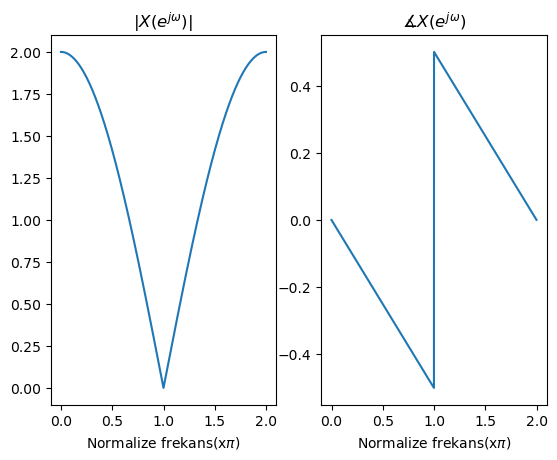

In [7]:
plt.subplot(121) # grafik çizimleri
plt.plot((w_cont/np.pi),(X_abs))
plt.title('$|X(e^{j\omega})|$')
plt.xlabel('Normalize frekans(x$\pi$)')

plt.subplot(122)
plt.plot((w_cont/np.pi),(X_phase/np.pi))
plt.title('$\measuredangle X(e^{j\omega})$')
plt.xlabel('Normalize frekans(x$\pi$)')

In [8]:
def dirac(n): # delta dirac fonksiyonu
 if n==0:
     return 1
 else:
     return 0

In [9]:
N=8 
X_k=np.zeros([N],dtype=complex) 
for k in range(N): 
    for n in range(N): 
        X_k[k]=X_k[k]+(dirac(n)+dirac(n-1))*np.exp(-1j*(2*np.pi/N)*k*n)

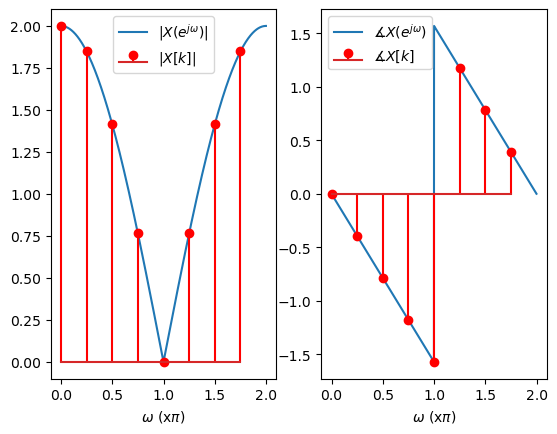

In [11]:
X_k_abs=np.abs(X_k)
X_k_phase=np.angle(X_k)

plt.figure()
plt.subplot(121)
plt.plot(w_cont/np.pi,X_abs,label='$|X(e^{j\omega})|$')
w_discrete=np.arange(0,N)*(2*np.pi/N)
plt.stem(w_discrete/np.pi,X_k_abs,'r-',label='$|X[k]|$',markerfmt='ro')
plt.xlabel('$\omega$ (x$\pi$)')
plt.legend()

plt.subplot(122)
plt.plot(w_cont/np.pi,X_phase,label='$ \measuredangle X(e^{j\omega})$')
plt.stem(w_discrete/np.pi,X_k_phase,'r-',label='$ \measuredangle X[k]$',markerfmt='ro')
plt.xlabel('$\omega$ (x$\pi$)')
plt.legend()

In [12]:
x=np.array([1,1])
fft_X=fft(x,8)
abs_fft_X=np.abs(fft_X)
phase_fft_X=np.angle(fft_X)

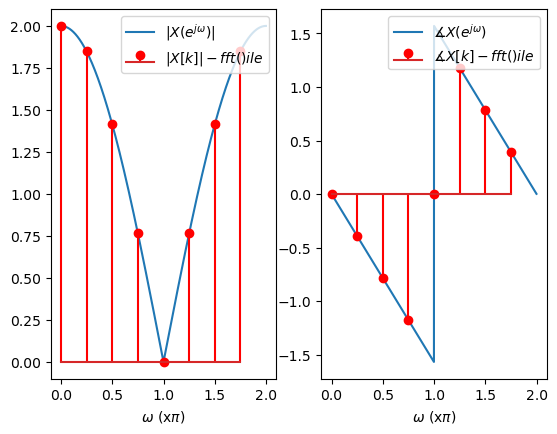

In [13]:
plt.figure()
plt.subplot(121)
plt.plot(w_cont/np.pi,X_abs,label='$|X(e^{j\omega})|$')
w_discrete=np.arange(0,N)*(2*np.pi/N)
plt.stem(w_discrete/np.pi,abs_fft_X,'ro-',label='$|X[k]|-fft() ile$')
plt.xlabel('$\omega$ (x$\pi$)')
plt.legend(loc='upper right')

plt.subplot(122)
plt.plot(w_cont/np.pi,X_phase,label='$ \measuredangle X(e^{j\omega})$')
plt.stem(w_discrete/np.pi,phase_fft_X,'ro-',label='$ \measuredangle X[k]-fft() ile$')
plt.xlabel('$\omega$ (x$\pi$)')
plt.legend(loc='upper right')

In [14]:
n1=np.arange(0,10) #n1 = 10
x1=np.cos(3*np.pi/5*n1)
X1_abs=np.abs(fft(x1))
w_disc_1=n1*2*np.pi/len(n1)#0-2pi arası 2pi/10 adımlı vektör 

n2=np.arange(0,15) #n2 = 15
x2=np.cos(3*np.pi/5*n2)
X2_abs=np.abs(fft(x2))
w_disc_2=n2*2*np.pi/len(n2)#0-2pi arası 2pi/15 adımlı vektör 

Text(0.5, 1.0, '$cos(\\frac{3\\pi}{5}n)$ 15 uzunluklu DFT')

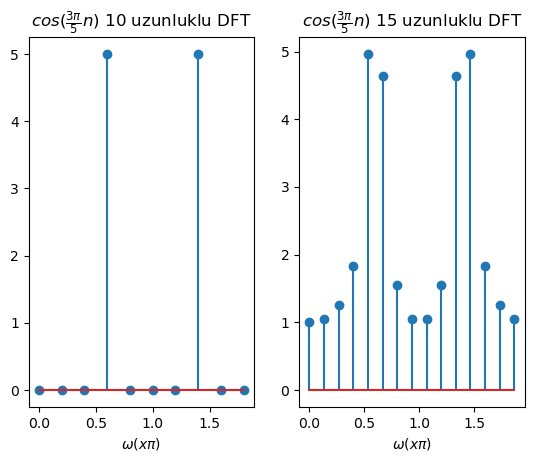

In [15]:
plt.figure()
plt.subplot(121)
plt.stem(w_disc_1/np.pi,X1_abs)
plt.xlabel('$\omega (x\pi)$')
plt.title('$cos(\\frac{3\\pi}{5}n)$ 10 uzunluklu DFT')

plt.subplot(122)
plt.stem(w_disc_2/np.pi,X2_abs)
plt.xlabel('$\omega (x\pi)$')
plt.title('$cos(\\frac{3\\pi}{5}n)$ 15 uzunluklu DFT')

In [16]:
x=np.array([0,2,0,-2])
N=len(x)
n=np.arange(0,4)
w_disc=n*2*np.pi/N 
X_abs=np.abs(fft(x)/N)
X_phase=np.angle(fft(x)/N)

Text(0.5, 1.0, '$\\frac{1}{N}\\measuredangle X(e^{j\\omega})(\\times\\pi)=\\measuredangle a_k(\\times \\pi)$')

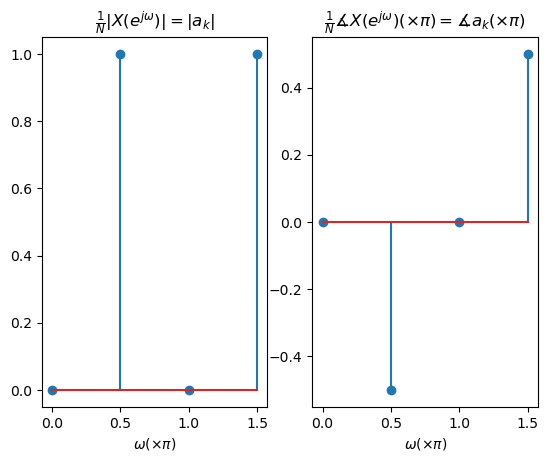

In [17]:
plt.subplot(121)
plt.stem(w_disc/np.pi,X_abs)
plt.xlabel('$\omega (\\times \pi)$')
plt.title('$\\frac{1}{N}|X(e^{j\omega})|=|a_{k}|$')

plt.subplot(122)
plt.stem(w_disc/np.pi,X_phase/np.pi)
plt.xlabel('$\omega (\\times \pi)$')
plt.title('$\\frac{1}{N}\measuredangle X(e^{j\omega})(\\times\pi)=\measuredangle a_k(\\times \pi)$')

In [18]:
n = np.arange(-20,21)
#yol-1
u_n = np.array([0 if i < 0 else 1 for i in n]) 
#yol-2
u_n = []
for i in n:
    if i<0:
        u_n.append(0)
    else:
        u_n.append(1)
#yol-3(bu yol önerilmemektedir)
u_n = np.concatenate((np.zeros(20),np.ones(21)))
#yol-4
u_n=np.ones(len(n))
u_n[n<0]=0

<StemContainer object of 3 artists>

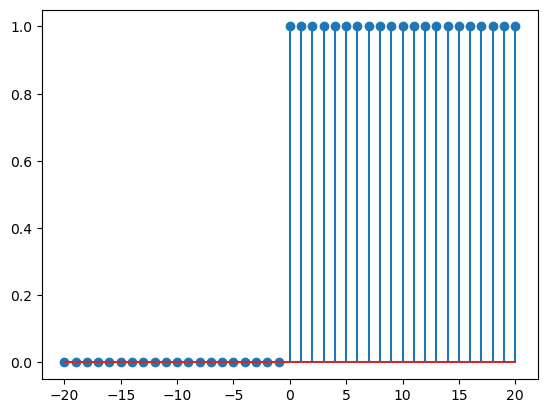

In [19]:
n = np.arange(-20,21) # bütün farkli u_n ler için aynı arrange kullanılmıştır.
u_n = np.array([0 if i < 0 else 1 for i in n]) 
plt.stem(n,u_n) #farklı u_n ler için grafik çizimi

<StemContainer object of 3 artists>

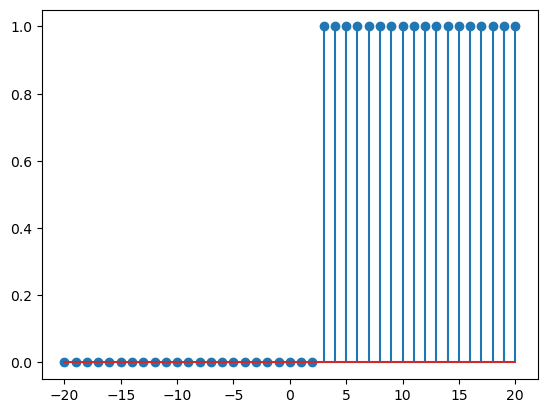

In [20]:
n= np.arange(-20,21)
u_n_3 = np.array([0 if i<3 else 1 for i in n])
plt.stem(n,u_n_3)

<StemContainer object of 3 artists>

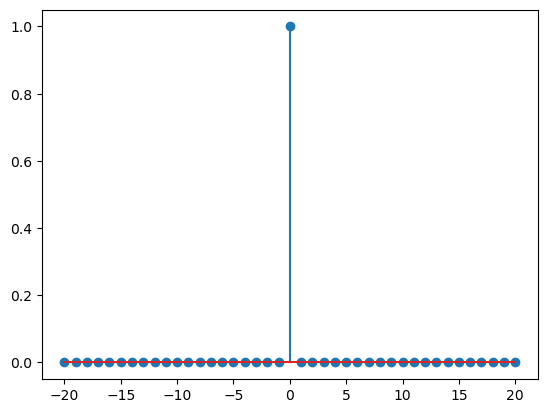

In [21]:
n= np.arange(-20,21)
dirac_n = np.array([0 if i!=0 else 1 for i in n])
plt.stem(n,dirac_n)

<StemContainer object of 3 artists>

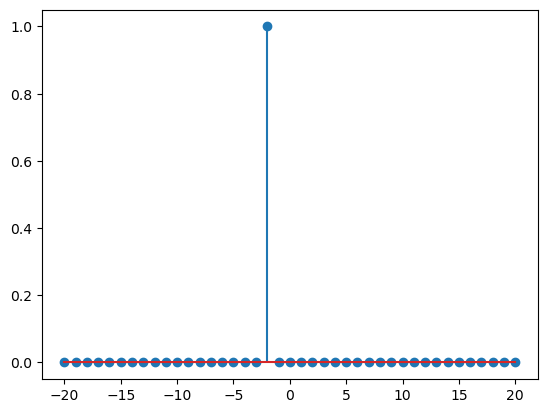

In [22]:
n= np.arange(-20,21)
dirac_n_arti_2 = np.array([0 if i!=-2 else 1 for i in n])
plt.stem(n,dirac_n_arti_2)

<StemContainer object of 3 artists>

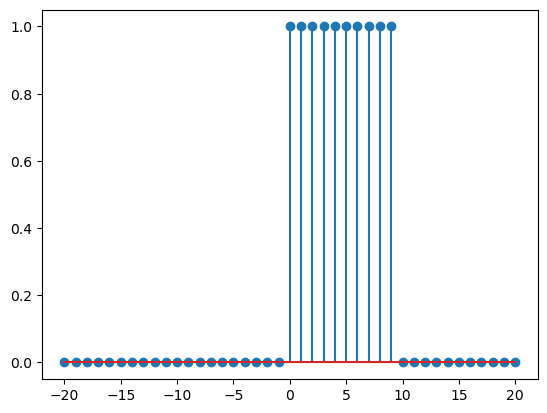

In [23]:
n= np.arange(-20,21)
u_n_eksi_u_n_10 =np.array([1 if i>=0 and i<10 else 0 for i in n])
plt.stem(n,u_n_eksi_u_n_10)

# Ön hazırlık soruları aşağıdaki gibi çözülmüştür.

# ODEV 3

# SORU 1

# a)

# ℎ[𝑛] = 𝛿[𝑛] −𝛿[𝑛 −1]

# h[n] ---- Fourier --> H(e^jw)

# H(e^jw) = 1 - e^-jw

# H(e^jw)    = 2e^j(𝜋 /2-w)sin(w/2)

# Genlik = | 2sin(w/2)| Faz = pi/2-w/2

# olarak el ile çözülmüştür.

Text(0.5, 0, 'Normalize frekans (x$\\pi$)')

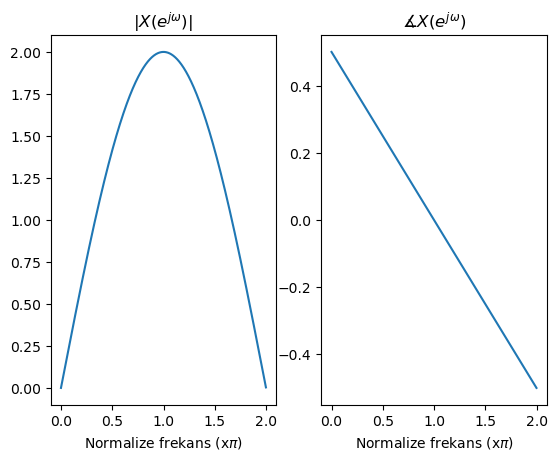

In [28]:
w_cont = np.arange(0,2*np.pi,np.pi/1000)
X_abs = np.abs(2*np.sin(w_cont/2))
X_phase=np.array([(np.pi/2)-(w/2) for w in w_cont])

plt.subplot(121) 
plt.plot(w_cont/np.pi,X_abs) 
plt.title('$|X(e^{j\omega})|$') 
plt.xlabel('Normalize frekans (x$\pi$)') 
plt.subplot(122) 
plt.plot(w_cont/np.pi,X_phase/np.pi) 
plt.title('$ \measuredangle X(e^{j\omega})$') 
plt.xlabel('Normalize frekans (x$\pi$)')

# b) 

# Merkez normalize frekansı pi olan band geçiren filtredir.

# c)

In [30]:
n=np.arange(0,11)
dirac_n = np.array([0 if i!=0 else 1 for i in n])
dirac_n_eksi_1 = np.array([0 if i!=1 else 1 for i in n])
h = dirac_n - dirac_n_eksi_1

In [31]:
fft_H=fft(h) #fast fourier transformu alındı
abs_fft_H=np.abs(fft_H)
phase_fft_H=np.angle(fft_H)

Text(0.5, 0, '$\\omega (x\\pi)$')

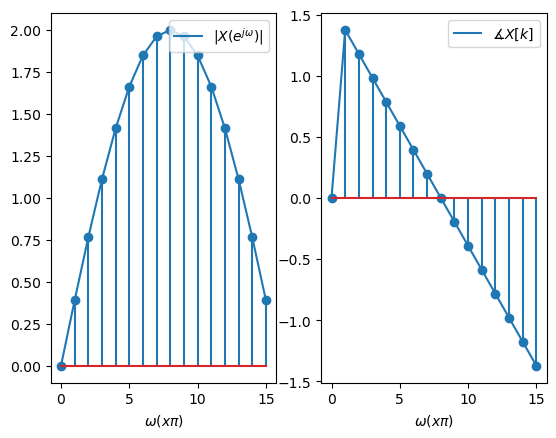

In [32]:
plt.figure()
plt.subplot(121)
plt.plot(n,abs_fft_H,label='$|X(e^{j\omega})|$')
plt.stem(n,abs_fft_H)
plt.legend(loc='upper right')
plt.xlabel('$\omega (x\pi)$')

plt.subplot(122)
plt.plot(n,phase_fft_H,label='$ \measuredangle X[k]$')
plt.stem(n,phase_fft_H)
plt.legend(loc='upper right')
plt.xlabel('$\omega (x\pi)$')